In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')

Dataset of 550 000 observations about the black Friday in a retail store, it contains different kinds of variables either numerical or categorical. It contains missing values.
```
User_ID: User
Product_ID: Id Product
Gender: Boolean
Age: Age customer
Occupation: Id Occupation of each customer
City_Category
Stay_In_Current_City_Years
Marital_Status
Product_Category_1
Product_Category_2
Product_Category_3
Purchase: Purchase amount in dollars
```

In [2]:
raw = pd.read_csv('blackFriday.csv')
df = raw.copy(deep=True)
total_sample = len(df.index)
df.shape

(537577, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# check missing values
df.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [6]:
missing_sum1 = df['Product_Category_2'].isnull().sum()
missing_sum2 = df['Product_Category_3'].isnull().sum()
print('Product_Category_2 missing rate: {0:.2f}%'.format(missing_sum1 / total_sample * 100))
print('Product_Category_3 missing rate: {0:.2f}%'.format(missing_sum2 / total_sample * 100))

Product_Category_2 missing rate: 31.06%
Product_Category_3 missing rate: 69.44%


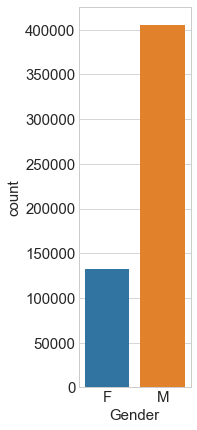

In [7]:
plt.figure(figsize=(2,7))
plt.rcParams.update({'font.size': 15})
sns.countplot(df['Gender'])

In [8]:
# df['User_ID'] = df['User_ID'] - 1000000
# Drop User_ID
df = df.drop('User_ID', axis=1)

In [9]:
# Encoding Gender
df['Gender'] = df['Gender'].replace('M', 0)
df['Gender'] = df['Gender'].replace('F', 1)

In [10]:
# Encoding Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Age'] = df['Age'].replace('0-17', 1)
df['Age'] = df['Age'].replace('18-25', 2)
df['Age'] = df['Age'].replace('26-35', 3)
df['Age'] = df['Age'].replace('36-45', 4)
df['Age'] = df['Age'].replace('46-50', 5)
df['Age'] = df['Age'].replace('51-55', 6)
df['Age'] = df['Age'].replace('55+', 7)

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969


In [13]:
# Occupation
tmp = df.Occupation.unique()
print(tmp, len(tmp))

[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 21


In [14]:
# Encoding City Category
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df['City_Category'] = df['City_Category'].replace('A', 0)
df['City_Category'] = df['City_Category'].replace('B', 1)
df['City_Category'] = df['City_Category'].replace('C', 2)

In [16]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,0,2,0,3,NaN,NaN,8370
1,P00248942,1,1,10,0,2,0,1,6.0,14.0,15200
2,P00087842,1,1,10,0,2,0,12,NaN,NaN,1422
3,P00085442,1,1,10,0,2,0,12,14.0,NaN,1057
4,P00285442,0,7,16,2,4+,0,8,NaN,NaN,7969


In [17]:
# Encoding Stay_In_Current_City_Years
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('0', 0)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('1', 1)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('2', 2)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('3', 3)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4)

In [19]:
df.Marital_Status.unique()

array([0, 1])

In [20]:
tmp = df.Product_Category_1.unique()
print(sorted(tmp), len(tmp))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] 18


In [21]:
# Product_Category_2, Product_Category_3
tmp = df.Product_Category_2.unique()
print(sorted(tmp), len(tmp))

[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0] 18


In [22]:
df['Product_Category_2'] = df['Product_Category_2'].replace(np.nan, 0.0)
# df['Product_Category_3'] = df['Product_Category_3'].replace(np.nan, 0.0)
df = df.drop('Product_Category_3', axis=1)
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P00069042,1,1,10,0,2,0,3,0.0,8370
1,P00248942,1,1,10,0,2,0,1,6.0,15200
2,P00087842,1,1,10,0,2,0,12,0.0,1422
3,P00085442,1,1,10,0,2,0,12,14.0,1057
4,P00285442,0,7,16,2,4,0,8,0.0,7969
5,P00193542,0,3,15,0,3,0,1,2.0,15227
6,P00184942,0,5,7,1,2,1,1,8.0,19215
7,P00346142,0,5,7,1,2,1,1,15.0,15854
8,P0097242,0,5,7,1,2,1,1,16.0,15686
9,P00274942,0,3,20,0,1,1,8,0.0,7871


In [23]:
# Encoding Product ID
len(df.Product_ID.unique())

3623

In [24]:
IDmap = dict()
newID = 0
for i in range(total_sample):    
    currentID = df.iloc[i, 0]
    if currentID not in IDmap:
        IDmap[currentID] = newID
        newID = newID + 1
len(set(IDmap.values()))

3623

In [25]:
for id in IDmap.keys():
    df['Product_ID'] = df['Product_ID'].replace(id, IDmap[id])
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,1,1,10,0,2,0,3,0.0,8370
1,1,1,1,10,0,2,0,1,6.0,15200
2,2,1,1,10,0,2,0,12,0.0,1422
3,3,1,1,10,0,2,0,12,14.0,1057
4,4,0,7,16,2,4,0,8,0.0,7969


Text(0.5, 1.0, 'Purchsae Distribution')

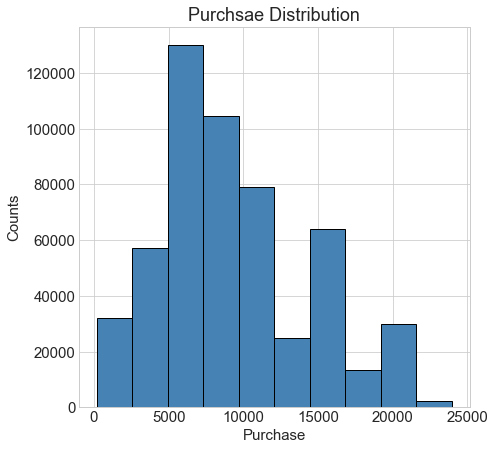

In [26]:
# Purchase
plt.figure(figsize=(7, 7))
plt.hist(df.Purchase,  density=False, alpha=1,
        histtype='bar', color='steelblue', 
        edgecolor='k')
plt.xlabel('Purchase')
plt.ylabel('Counts')
plt.title('Purchsae Distribution')

In [27]:
df.loc[(df['Purchase'] >= 185) & (df['Purchase'] < 2563), 'Purchase'] = 1
df.loc[(df['Purchase'] >= 2563) & (df['Purchase'] < 4940), 'Purchase'] = 2
df.loc[(df['Purchase'] >= 4940) & (df['Purchase'] < 7318), 'Purchase'] = 3
df.loc[(df['Purchase'] >= 7318) & (df['Purchase'] < 9695), 'Purchase'] = 4
df.loc[(df['Purchase'] >= 9695) & (df['Purchase'] < 12073), 'Purchase'] = 5
df.loc[(df['Purchase'] >= 12073) & (df['Purchase'] < 14450), 'Purchase'] = 6
df.loc[(df['Purchase'] >= 14450) & (df['Purchase'] < 16828), 'Purchase'] = 7
df.loc[(df['Purchase'] >= 16828) & (df['Purchase'] < 19205), 'Purchase'] = 8
df.loc[(df['Purchase'] >= 19205) & (df['Purchase'] < 21583), 'Purchase'] = 9
df.loc[(df['Purchase'] >= 21583) & (df['Purchase'] < 23962), 'Purchase'] = 10

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,1,1,10,0,2,0,3,0.0,4
1,1,1,1,10,0,2,0,1,6.0,7
2,2,1,1,10,0,2,0,12,0.0,1
3,3,1,1,10,0,2,0,12,14.0,1
4,4,0,7,16,2,4,0,8,0.0,4


In [29]:
df.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
537572,5,0,4,16,2,1,0,1,2.0,5
537573,41,0,4,16,2,1,0,1,15.0,8
537574,2297,0,4,16,2,1,0,8,15.0,4
537575,842,0,4,16,2,1,0,5,0.0,3
537576,2712,0,4,16,2,1,0,5,8.0,3


In [30]:
features = list(df.columns)
features.remove('Purchase')
features

['Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2']

In [31]:
# Standardize Data
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis=0)) / np.std(raw_data, axis=0))
df[features] = standardize(df[features])
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,-1.233261,1.751138,-1.844439,0.293877,-1.369841,0.108962,-0.831545,-0.612032,-1.092294,4
1,-1.231914,1.751138,-1.844439,0.293877,-1.369841,0.108962,-0.831545,-1.145266,-0.126361,7
2,-1.230566,1.751138,-1.844439,0.293877,-1.369841,0.108962,-0.831545,1.787522,-1.092294,1
3,-1.229219,1.751138,-1.844439,0.293877,-1.369841,0.108962,-0.831545,1.787522,1.161549,1
4,-1.227872,-0.571057,2.591521,1.213543,1.263032,1.659557,-0.831545,0.721053,-1.092294,4


In [32]:
df.to_csv('blcakFriday_vector.csv')